# Comparison of Three Methods to Clear Sponge-Wedge Chips

## Summary Graphs

### Data

In [1]:
data_csv_filename = 'method_comparison_data.xlsx'

In [2]:
def _get_src_dir() -> str:
    return os.path.split(os.path.dirname(os.path.abspath('__file__')))[0]

In [3]:
import os
from pathlib import Path
os.chdir(_get_src_dir())
from src.utility import _Utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
data_path = os.path.join(_Utility.get_user_data_dir_path(), data_csv_filename)

In [5]:
print(data_path)

/home/mkrause/data/biofuel-cell/method_comparison_data.xlsx


#### Read all sheets of the Excel file

In [6]:
try:
    xlsx = pd.read_excel(data_path, sheet_name=None)
    print(xlsx.keys())
except FileNotFoundError as e:
    print(f'Error: {e}')
    path = Path(data_path)
    if not _Utility.path_exists(path):
        print(f"path {path} doesn't exist")
    if not _Utility.dir_exists(path):
        print(f"directory 'data' doesn't exist")
    if not _Utility.file_exists(path):
        print(f"file {data_csv_filename} doesn't exist")

dict_keys(['Sheet1'])


Add a 'Sheet' column to each dataframe. This is necessary because the sheet names are not a column in the Excel file.

In [7]:
for sheet_name in xlsx.keys():
    xlsx[sheet_name]['Sheet'] = sheet_name

Concatenate sheets of positive controls into one DataFrame

In [8]:
df = pd.concat(xlsx[frame] for frame in xlsx.keys())

In [9]:
df

,experiment ID,image filename,chip ID,chip side(f or b),number of channels not cleared,% cleared,Sheet
0,3,IMG_7478,N-1,front,36.0,43.7500,Sheet1
1,3,IMG_7479,N-1,back,28.0,56.2500,Sheet1
2,3,IMG_7480,N-2,front,20.0,68.7500,Sheet1
3,3,IMG_7481,N-2,back,32.0,50.0000,Sheet1
4,3,IMG_7482,N-3,front,24.0,62.5000,Sheet1
5,3,IMG_7483,N-3,back,30.0,53.1250,Sheet1
6,3,IMG_7533,N-1,front,13.0,79.6875,Sheet1
7,3,IMG_7534,N-1,back,8.0,87.5000,Sheet1
8,3,IMG_7531,N-2,front,8.0,87.5000,Sheet1
9,3,IMG_7530,N-2,back,22.0,65.6250,Sheet1


## Plot all data

### Define constants for the analysis

In [34]:
col_data = '% cleared'
col_category = 'experiment ID'
experiments = (1, 3)
col_frac_not_cleared = 'number of channels not cleared'
fig_png = 'png'
fig_svg = 'svg'
title = 'Comparison of Clearance Methods'
df[df[col_category] == 3]

,experiment ID,image filename,chip ID,chip side(f or b),number of channels not cleared,% cleared,Sheet
0,3,IMG_7478,N-1,front,36.0,43.7500,Sheet1
1,3,IMG_7479,N-1,back,28.0,56.2500,Sheet1
2,3,IMG_7480,N-2,front,20.0,68.7500,Sheet1
3,3,IMG_7481,N-2,back,32.0,50.0000,Sheet1
4,3,IMG_7482,N-3,front,24.0,62.5000,Sheet1
5,3,IMG_7483,N-3,back,30.0,53.1250,Sheet1
6,3,IMG_7533,N-1,front,13.0,79.6875,Sheet1
7,3,IMG_7534,N-1,back,8.0,87.5000,Sheet1
8,3,IMG_7531,N-2,front,8.0,87.5000,Sheet1
9,3,IMG_7530,N-2,back,22.0,65.6250,Sheet1


### Create a summary plot

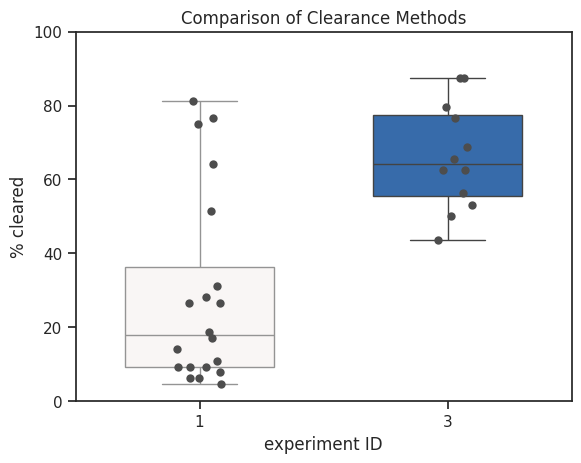

In [35]:
sns.set_theme(style="ticks")

# Create boxplots.
for experiment in experiments:
    df_filtered = df[(df[col_category] == experiment) & (df[col_frac_not_cleared] > 1.0)]
    sns.boxplot(
        df_filtered, x=col_category, y=col_data, hue=col_category,
        whis=[0, 100], width=.6, palette="vlag"
    )
    # Add in points to show each observation
    sns.stripplot(df_filtered, x=col_category, y=col_data, size=6, color=".3")

plt.ylim(0, 100)
plt.title(title)

# Remove the legend
plt.legend([],[], frameon=False)

plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/boxplot_v1.{fig_png}')
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/boxplot_v1.{fig_svg}')

plt.show()

### Cluster data
From the plot it looks like data points from experiment 1 fall into two clusters. Here we use Gaussian mixture model and the Expectation-Maximization algorithm to identify two clusters from the data.

In [92]:
df_filtered = df[(df[col_category] == 1) & (df[col_frac_not_cleared] > 1.0)]
df_filtered[col_data].tolist()

[7.8125,
 6.25,
 6.25,
 4.6875,
 17.1875,
 14.0625,
 9.375,
 9.375,
 9.375,
 10.9375,
 18.75,
 26.5625,
 31.25,
 51.5625,
 28.125,
 26.5625,
 76.5625,
 81.25,
 64.0625,
 75.0]

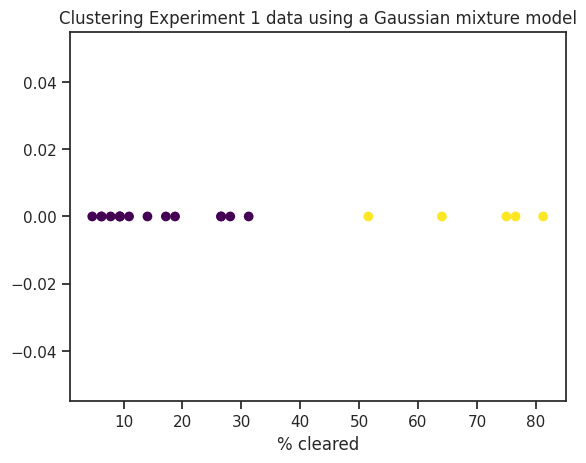

In [95]:
from sklearn.mixture import GaussianMixture
import numpy as np
from typing import Any

def find_clusters(data: Any) -> np.ndarray:
    """Find clusters in data."""
    data = np.array(data)

    # Fit GMM
    gmm = GaussianMixture(n_components=2)  # Assuming two peaks
    gmm.fit(data.reshape(-1, 1))

    # Predict clusters
    clusters = gmm.predict(data.reshape(-1, 1))
    
    return clusters

data = df_filtered[col_data].tolist()
clusters = find_clusters(data=data)

# Plotting the results
plt.scatter(data, np.zeros_like(data), c=clusters, cmap='viridis')
plt.title('Clustering Experiment 1 data using a Gaussian mixture model')
plt.xlabel(col_data)
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/experiment_1_gmm_cluster.{fig_png}')
plt.show()

### Average and Standard Deviation

In [99]:
from statistics import mean, stdev

def get_mean_and_stdev(category: int, data: list, clusters: np.ndarray) -> tuple[float, float]:
    data = [x for idx, x in enumerate(data) if clusters.tolist()[idx] == category]
    return mean(data), stdev(data)

print(clusters.tolist())
df_ = df[(df[col_category] == 1) & (df[col_frac_not_cleared] > 1.0)]
data = df_[col_data].tolist()
print(data)

categories = {'low_clearance': 0, 'high_clearance': 1}
# Experiment 1 low clearance:
mean_, stdev_ = get_mean_and_stdev(categories['low_clearance'], data=data, clusters=clusters)
print(f'low clearance: mean: {mean_}, standard dev.: {stdev_}')

# Experiment 1 high clearance:
mean_, stdev_ = get_mean_and_stdev(categories['high_clearance'], data=data, clusters=clusters)
print(f'high clearance: mean: {mean_}, standard dev.: {stdev_}')

# Experiment 3:
df_ = df[(df[col_category] == 3) & (df[col_frac_not_cleared] > 1.0)]
data = df_[col_data].tolist()
print(f'Exp. 3 clearance: mean: {mean(data)}, standard dev.: {stdev(data)}')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]
[7.8125, 6.25, 6.25, 4.6875, 17.1875, 14.0625, 9.375, 9.375, 9.375, 10.9375, 18.75, 26.5625, 31.25, 51.5625, 28.125, 26.5625, 76.5625, 81.25, 64.0625, 75.0]
low clearancen: mean: 15.104166666666666, standard dev.: 9.046835805696823
high clearancen: mean: 69.6875, standard dev.: 11.930380730513171
Exp. 3 clearance: mean: 66.14583333333333, standard dev.: 14.356666503964652
